In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from head import Emulator
sim = Emulator(r_mu=5)

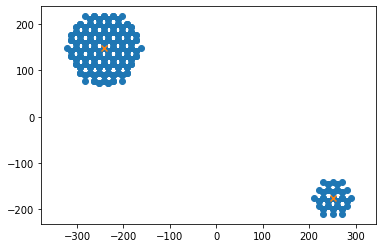

In [4]:
sim.plot_structure2d()

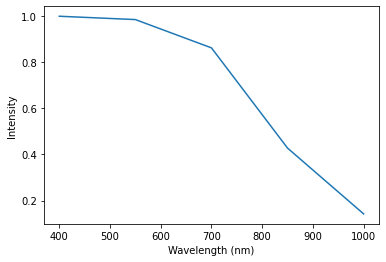

In [5]:
# to reduce the computation, the simulation parameters are adjusted
wl, I = sim.get_spectrum()
fig,ax = plt.subplots()
ax.plot(wl,I)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Intensity')
plt.show()

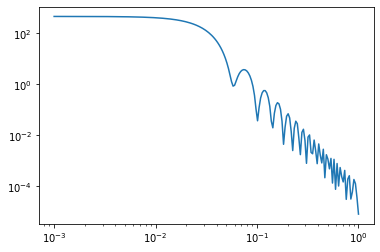

In [6]:
q, pq = sim.get_saxs()
plt.loglog(q, pq)
plt.show()